# Taller 7
Métodos Computacionales para Políticas Públicas - URosario

**Entrega: viernes 14-oct-2016 11:59 PM**

<div class="alert alert-success">
**[John Alexander Caro Becerra]** <br><br>
[jhonalexbc@gmail.com]
</div>

## Instrucciones:
- Guarde una copia de este *Jupyter Notebook* en su computador, idealmente en una carpeta destinada al material del curso.
- Modifique el nombre del archivo del *notebook*, agregando al final un guión inferior y su nombre y apellido, separados estos últimos por otro guión inferior. Por ejemplo, mi *notebook* se llamaría: mcpp_taller7_santiago_matallana
- Marque el *notebook* con su nombre y e-mail en el bloque verde arriba. Reemplace el texto "[Su nombre acá]" con su nombre y apellido. Similar para su e-mail.
- Desarrolle la totalidad del taller sobre este *notebook*, insertando las celdas que sea necesario debajo de cada pregunta. Haga buen uso de las celdas para código y de las celdas tipo *markdown* según el caso.
- Recuerde salvar periódicamente sus avances.
- Cuando termine el taller:
    1. Descárguelo en PDF. Si tiene algún problema con la conversión, descárguelo en HTML.
    2. Suba todos los archivos a su repositorio en GitHub, en una carpeta destinada exclusivamente para este taller, antes de la fecha y hora límites.

(Todos los ejercicios tienen el mismo valor.)

---

Este taller tiene dos partes. Una obligatoria, relativamente fácil, y otra voluntaria y más retadora. Los invito a intentar desarrollar el taller en su totalidad.

En este taller exploraremos los datos de crimen de Chicago. 

Descargue los datos de crimen del Chicago Data Portal solo para el año 2015 (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

### Parte obligatoria

### 1.
Calcule el número de crímenes en cada Community Area en 2015. Haga un gráfico de barras que lo ilustre.

In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [18.0, 10.0]
plt.style.use('ggplot')

crimes = pd.read_csv('Crimes_-_2001_to_present.csv', parse_dates=['Date']) 

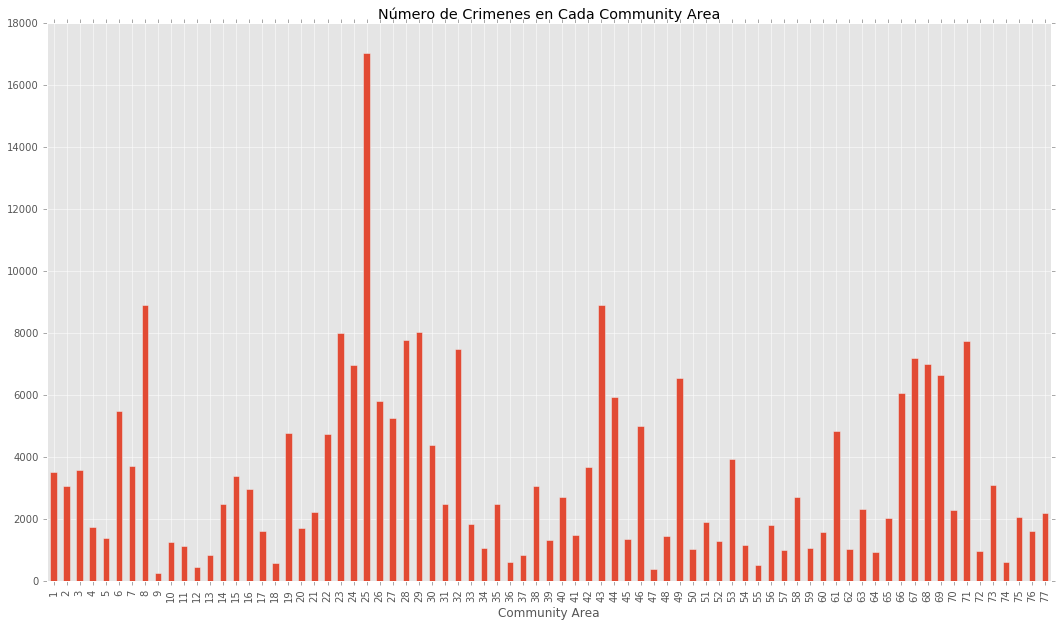

In [2]:
numeros_crimenes_c_area = crimes.groupby('Community Area')['ID'].agg('count')
numeros_crimenes_c_area.plot(kind='bar',title="Número de Crimenes en Cada Community Area");

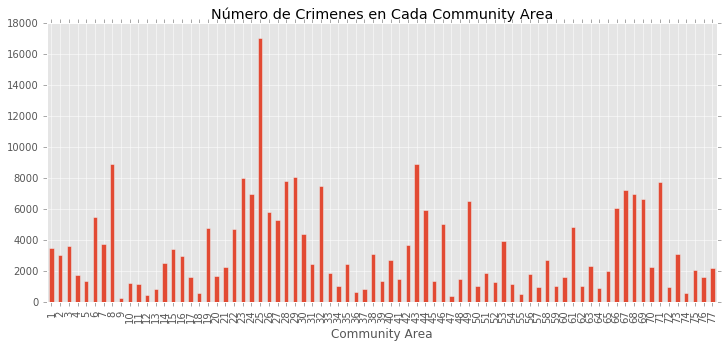

In [3]:
numeros_crimenes_c_area.plot(kind='bar', figsize=(12,5),title="Número de Crimenes en Cada Community Area");

### 2.
Ordene las Community Areas de acuerdo con el número de crímenes. ¿Qué Community Area (por nombre, idealmente) presenta el mayor número de crímenes? ¿El menor?

In [4]:
numeros_crimenes_c_area_ordenado = numeros_crimenes_c_area.sort_values()
C_area_menor_crimenes = numeros_crimenes_c_area_ordenado.head(1)
C_area_mayor_crimenes = numeros_crimenes_c_area_ordenado.tail(1)
numeros_crimenes_c_area_ordenado

Community Area
9       254
47      380
12      444
55      506
18      572
74      608
36      622
13      828
37      834
64      927
72      976
57      986
62     1030
50     1037
34     1057
59     1063
11     1140
54     1173
10     1259
52     1303
39     1340
45     1356
5      1375
48     1458
41     1493
60     1590
76     1622
17     1626
20     1703
4      1747
      ...  
73     3109
15     3392
1      3519
3      3585
42     3665
7      3726
53     3949
30     4393
22     4737
19     4769
61     4842
46     5009
27     5270
6      5495
26     5794
44     5943
66     6081
49     6545
69     6653
24     6959
68     6991
67     7203
32     7489
71     7733
28     7788
23     8015
29     8039
43     8906
8      8920
25    17020
Name: ID, dtype: int64

In [5]:
C_area_menor_crimenes

Community Area
9    254
Name: ID, dtype: int64

In [6]:
C_area_mayor_crimenes 

Community Area
25    17020
Name: ID, dtype: int64

### 3.
Cree una tabla cuyas filas sean días del año (yyyy-mm-dd) y las columnas las 77 Community Areas. En cada campo de la tabla deberá haber el correspondiente número de crímenes. Seleccione algunas Community Areas que le llamen la atención y haga un gráfico de serie de tiempo.

Pista: El siguiente código puede serle útil.

In [7]:
# Create function to strip time from date field, and use it to create another column
def to_day(timestamp):
    return timestamp.replace(minute=0,hour=0, second=0)

crimes['Day'] = crimes['Date'].apply(to_day)

In [11]:
crimes_by_community_day = crimes.groupby(['Community Area', 'Day'])

crimes_by_community_day_count = crimes_by_community_day['ID'].agg('count')
crimes_by_community_day_count

Community Area  Day       
1               2015-01-01    13
                2015-01-02     5
                2015-01-03     7
                2015-01-04    12
                2015-01-05     6
                2015-01-06     7
                2015-01-07     6
                2015-01-08     6
                2015-01-09    10
                2015-01-10     6
                2015-01-11     8
                2015-01-12     3
                2015-01-13    10
                2015-01-14    17
                2015-01-15     9
                2015-01-16    13
                2015-01-17    12
                2015-01-18    12
                2015-01-19     3
                2015-01-20     8
                2015-01-21    18
                2015-01-22     7
                2015-01-23    12
                2015-01-24    14
                2015-01-25     5
                2015-01-26    10
                2015-01-27     6
                2015-01-28    15
                2015-01-29     9
                

In [12]:
community_timeseries = crimes_by_community_day_count.unstack('Community Area')
community_timeseries

Community Area,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,77
Day,,,,,,,,,,,,,,,,,,,,,
2015-01-01,13.0,7.0,11.0,4.0,5.0,22.0,12.0,43.0,1.0,5.0,...,29.0,23.0,9.0,44.0,2.0,8.0,2.0,5.0,6.0,8.0
2015-01-02,5.0,9.0,8.0,3.0,2.0,10.0,9.0,27.0,NaN,2.0,...,12.0,21.0,5.0,17.0,1.0,11.0,1.0,2.0,6.0,5.0
2015-01-03,7.0,11.0,9.0,7.0,4.0,6.0,11.0,27.0,1.0,3.0,...,23.0,12.0,8.0,18.0,NaN,8.0,1.0,7.0,3.0,3.0
2015-01-04,12.0,7.0,9.0,10.0,3.0,15.0,5.0,16.0,1.0,4.0,...,13.0,15.0,9.0,12.0,1.0,5.0,NaN,1.0,6.0,1.0
2015-01-05,6.0,7.0,5.0,4.0,5.0,15.0,7.0,11.0,1.0,3.0,...,16.0,12.0,8.0,17.0,NaN,5.0,2.0,2.0,7.0,5.0
2015-01-06,7.0,8.0,6.0,5.0,NaN,13.0,7.0,13.0,NaN,4.0,...,15.0,14.0,6.0,11.0,2.0,8.0,2.0,3.0,6.0,4.0
2015-01-07,6.0,2.0,4.0,5.0,1.0,8.0,6.0,17.0,1.0,2.0,...,11.0,7.0,4.0,16.0,3.0,7.0,NaN,3.0,7.0,1.0
2015-01-08,6.0,6.0,3.0,5.0,NaN,6.0,5.0,8.0,1.0,NaN,...,9.0,9.0,6.0,10.0,2.0,4.0,1.0,5.0,3.0,3.0
2015-01-09,10.0,5.0,10.0,2.0,4.0,14.0,6.0,21.0,NaN,3.0,...,18.0,14.0,10.0,20.0,1.0,9.0,2.0,8.0,5.0,2.0


In [14]:
community_timeseries.describe()

C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Community Area,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,77
count,364.000000,364.000000,364.000000,357.000000,347.000000,365.000000,364.000000,364.000000,180.000000,352.000000,...,364.000000,364.000000,364.000000,364.000000,332.000000,364.000000,289.000000,362.000000,360.000000,362.00000
mean,9.667582,8.403846,9.848901,4.893557,3.962536,15.054795,10.236264,24.505495,1.411111,3.576705,...,19.206044,18.277473,6.260989,21.244505,2.939759,8.541209,2.103806,5.668508,4.505556,6.10221
std,3.396959,3.024070,3.656267,2.318680,2.097696,6.664426,3.826715,7.202117,0.707414,1.924448,...,5.626469,5.052609,2.679483,5.210510,1.820324,3.082154,1.275961,2.567764,2.141244,2.55641
min,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,5.000000,1.000000,1.000000,...,7.000000,5.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,20.000000,21.000000,29.000000,13.000000,12.000000,71.000000,21.000000,53.000000,5.000000,10.000000,...,41.000000,33.000000,16.000000,44.000000,9.000000,20.000000,9.000000,15.000000,11.000000,14.00000


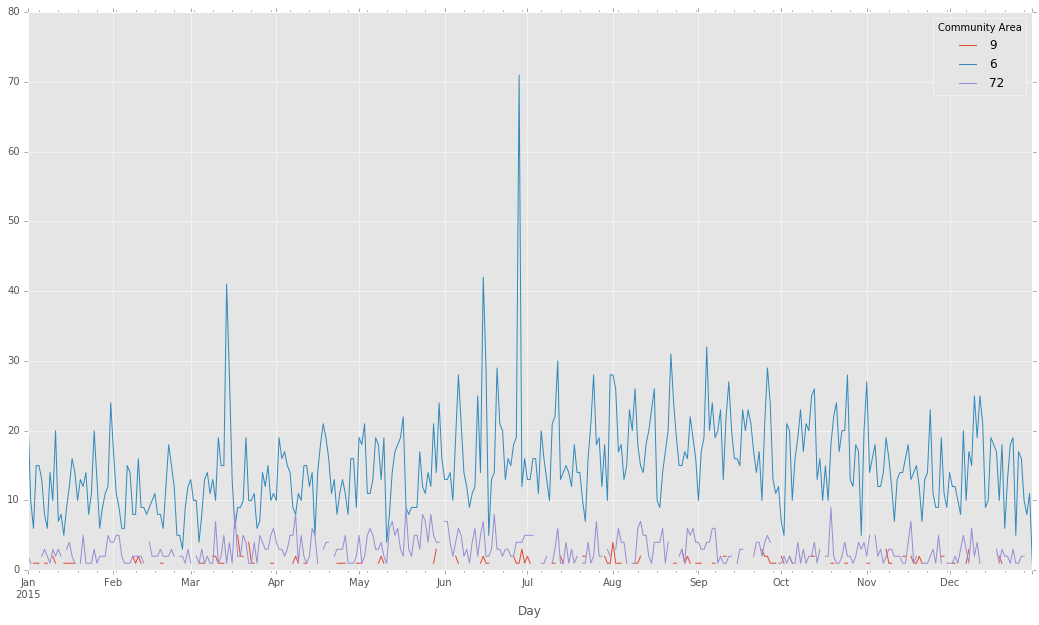

In [15]:
community_timeseries[[9,6,72]].plot();

### Parte voluntaria

Descargue la base de datos de información socioeconómica (https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2).

### 4.
Cree una tabla que agregue el número de crímenes por Community Area. Una esa tabla con la de datos socioeconómicos y cree un "scatter plot" de número de crímenes vs ingreso per cápita. Explique la relación en palabras.

In [79]:
n_c=numeros_crimenes_c_area

In [41]:
crimes2 = pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv') 

In [49]:
crimes2

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
5,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
6,7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
7,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
8,9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
9,10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


In [69]:
precapita=crimes2.loc[0:76,['Community Area Number',"PER CAPITA INCOME "]]

In [70]:
precapita

,Community Area Number,PER CAPITA INCOME
0,1.0,23939
1,2.0,23040
2,3.0,35787
3,4.0,37524
4,5.0,57123
5,6.0,60058
6,7.0,71551
7,8.0,88669
8,9.0,40959
9,10.0,32875


In [77]:
n_c.iloc[0:77,]

,ID
Community Area,
1,3519
2,3059
3,3585
4,1747
5,1375
6,5495
7,3726
8,8920
9,254


In [60]:
precapita

,Community Area Number,PER CAPITA INCOME
0,1.0,23939
1,2.0,23040
2,3.0,35787
3,4.0,37524
4,5.0,57123
5,6.0,60058
6,7.0,71551
7,8.0,88669
8,9.0,40959
9,10.0,32875


In [94]:
precapita["Crimes"]=n_c.iloc[0:77,]

#df_tmp["tmp_factorial"] = df_tmp["tmp"].apply(np.math.factorial)

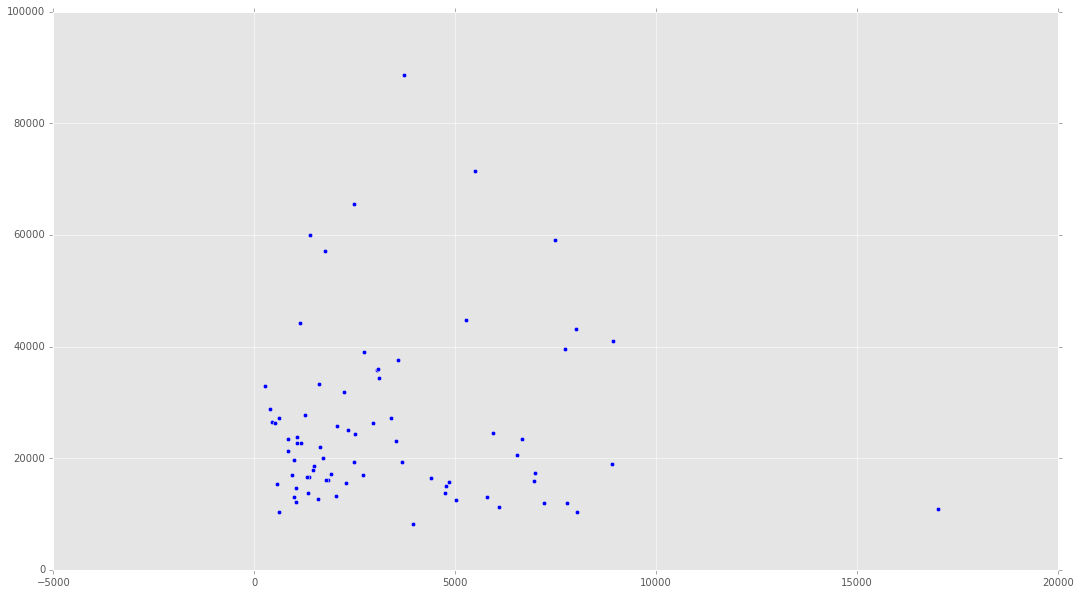

In [97]:
plt.scatter(precapita["Crimes"],precapita["PER CAPITA INCOME "])
plt.show()